# Use all the resampling techniques & cross validation techniques & measure the accuracy using KNN Classifier. Compare the accuracy with sampling data & without sampling data.

In [67]:
import pandas as pd    
import warnings
warnings.filterwarnings("ignore")
df = pd.read_excel('new Churn.xlsx')
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [68]:
df.isnull().sum()

Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
df['Churn'].value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

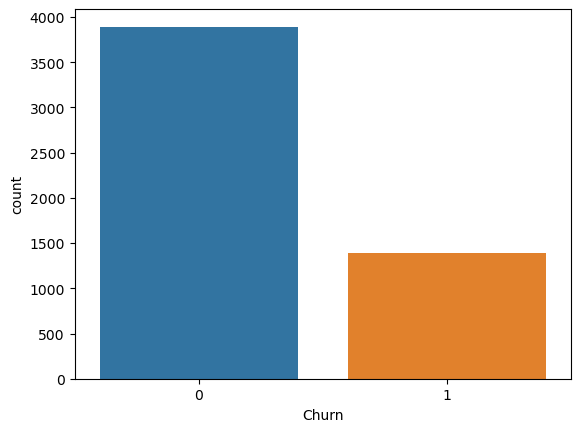

In [70]:
import seaborn as sns
sns.countplot(x='Churn', data=df)

In [71]:
x = df.drop('Churn',axis=1)
y= df[['Churn']]

# Synthetic Minority Oversampling Technique (SMOTE)

In [72]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=44)

In [73]:
y.value_counts()

Churn
0        3892
1        1390
Name: count, dtype: int64

In [74]:
X,Y = sm.fit_resample(x,y)

In [75]:
Y.value_counts()

Churn
0        3537
1        3537
Name: count, dtype: int64

In [76]:
# Hold out cross validation
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest =  train_test_split(X,Y,test_size=0.3,random_state=5)

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,p=1,weights='distance')
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [78]:
ypredk = knn.predict(xtest)
ypredk

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
import numpy as np
ytestk = np.ravel(ytest)
df_pred = pd.DataFrame({'Actual': ytestk, 'Prediction': ypredk,})
df_pred.head()

,Actual,Prediction
0,1,1
1,0,0
2,0,0
3,1,0
4,1,1


In [80]:
knn_accuracy_SMOTE_H = knn.score(xtest,ytest)
knn_accuracy_SMOTE_H

0.7677814413565709

In [81]:
# K Fold Cross Validation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=4)
knn_accuracy_SMOTE_K = cross_val_score(knn,X,Y,cv=kfold)
knn_accuracy_SMOTE_K_mean = knn_accuracy_SMOTE_K.mean()
knn_accuracy_SMOTE_K_mean

0.7625323251881959

In [82]:
#Stratified K Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
st = StratifiedKFold(n_splits=4)
knn_accuracy_SMOTE_S = cross_val_score(knn,X,Y,cv=st)
knn_accuracy_SMOTE_S_mean = knn_accuracy_SMOTE_S.mean()
knn_accuracy_SMOTE_S_mean

0.799269294076721

# Near Miss Under Sampling (NMUS)

In [28]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
n_x, n_y  = nm.fit_resample(x,y)

In [30]:
n_y.value_counts()

Churn
0        1390
1        1390
Name: count, dtype: int64

In [85]:
# Hold out cross validation
xtrain,xtest,ytrain,ytest =  train_test_split(n_x,n_y,test_size=0.3,random_state=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [86]:
ypredk = knn.predict(xtest)
ypredk

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [87]:
ytestk = np.ravel(ytest)
df_pred = pd.DataFrame({'Actual': ytestk, 'Prediction': ypredk,})
df_pred.head()

,Actual,Prediction
0,0,0
1,0,1
2,1,0
3,1,1
4,1,0


In [88]:
knn_accuracy_NMUS_H = knn.score(xtest,ytest)
knn_accuracy_NMUS_H

0.47961630695443647

In [89]:
# K Fold Cross Validation
knn_accuracy_NMUS_K = cross_val_score(knn,n_x,n_y,cv=kfold)
knn_accuracy_NMUS_K_mean = knn_accuracy_NMUS_K.mean()
knn_accuracy_NMUS_K_mean

0.20071942446043164

In [90]:
#Stratified K Fold Cross Validation
knn_accuracy_NMUS_S = cross_val_score(knn,n_x,n_y,cv=st)
knn_accuracy_NMUS_S_mean = knn_accuracy_NMUS_S.mean()
knn_accuracy_NMUS_S_mean

0.43345323741007197

# Over Sampling

In [91]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=44)
o_x, o_y = over.fit_resample(x,y)

In [92]:
o_y.value_counts()

Churn
0        3892
1        3892
Name: count, dtype: int64

In [93]:
# Hold out cross validation
xtrain,xtest,ytrain,ytest =  train_test_split(o_x,o_y,test_size=0.3,random_state=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [94]:
ypredk = knn.predict(xtest)
ypredk

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [95]:
ytestk = np.ravel(ytest)
df_pred = pd.DataFrame({'Actual': ytestk, 'Prediction': ypredk,})
df_pred.head()

,Actual,Prediction
0,0,1
1,1,1
2,0,1
3,0,1
4,1,1


In [96]:
knn_accuracy_over_H = knn.score(xtest,ytest)
knn_accuracy_over_H

0.7684075342465754

In [97]:
# K Fold Cross Validation
knn_accuracy_over_K = cross_val_score(knn,o_x,o_y,cv=kfold)
knn_accuracy_over_K_mean = knn_accuracy_over_K.mean()
knn_accuracy_over_K_mean

0.7745375128468653

In [98]:
#Stratified K Fold Cross Validation
knn_accuracy_over_S = cross_val_score(knn,o_x,o_y,cv=st)
knn_accuracy_over_S_mean = knn_accuracy_over_S.mean()
knn_accuracy_over_S_mean

0.7947070914696814

# Without Sampling

In [104]:
## Hold out cross validation
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,test_size=.3,random_state=42)
knn.fit(xtrain1, ytrain1)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [105]:
ypredk = knn.predict(xtest)
ypredk

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [106]:
ytestk = np.ravel(ytest)
df_pred = pd.DataFrame({'Actual': ytestk, 'Prediction': ypredk,})
df_pred.head()

,Actual,Prediction
0,0,0
1,1,1
2,0,0
3,0,0
4,1,0


In [107]:
knn_accuracy_H = knn.score(xtest1,ytest1)
knn_accuracy_H

0.6958990536277603

In [108]:
# K Fold cross validation
knn_accuracy_K = cross_val_score(knn,xtest1,ytest1,cv=kfold)
knn_accuracy_K_mean = knn_accuracy_K.mean()
knn_accuracy_K_mean

0.675719728773885

In [109]:
#Stratified K Fold Cross Validation
knn_accuracy_S = cross_val_score(knn,xtest1,ytest1,cv=st)
knn_accuracy_S_mean = knn_accuracy_S.mean()
knn_accuracy_S_mean

0.6750852352237743

# Comparison 

In [113]:
data = {
    'Metric': [
        'SMOTE_Accuracy_Hold', 'SMOTE_Accuracy_K_Fold', 'SMOTE_Accuracy_Stratified_K_Fold',
        'NMUS_Accuracy_Hold', 'NMUS_Accuracy_K_Fold', 'NMUS_Accuracy_Stratified_K_Fold',
        'Over_Accuracy_Hold', 'Over_Accuracy_K_Fold', 'Over_Accuracy_Stratified_K_Fold'
    ],
    'Sampling': [
        knn_accuracy_SMOTE_H, knn_accuracy_SMOTE_K_mean, knn_accuracy_SMOTE_S_mean,
        knn_accuracy_NMUS_H, knn_accuracy_NMUS_K_mean, knn_accuracy_NMUS_S_mean,
        knn_accuracy_over_H, knn_accuracy_over_K_mean, knn_accuracy_over_S_mean
    ]
}
comparison_table = pd.DataFrame(data)
comparison_table.set_index('Metric', inplace=True)
print(comparison_table)


                                  Sampling
Metric                                    
SMOTE_Accuracy_Hold               0.767781
SMOTE_Accuracy_K_Fold             0.762532
SMOTE_Accuracy_Stratified_K_Fold  0.799269
NMUS_Accuracy_Hold                0.479616
NMUS_Accuracy_K_Fold              0.200719
NMUS_Accuracy_Stratified_K_Fold   0.433453
Over_Accuracy_Hold                0.768408
Over_Accuracy_K_Fold              0.774538
Over_Accuracy_Stratified_K_Fold   0.794707


In [116]:
d = {
    'Metric': [
        'Hold Out Cross Validation', 'K-Fold Cross Validation', 'Stratified-K-Fold',
    ],
    'Without Sampling': [
        knn_accuracy_H, knn_accuracy_K_mean, knn_accuracy_S_mean
    ]
}
c = pd.DataFrame(d)
c.set_index('Metric', inplace=True)
print(c)

                           Without Sampling
Metric                                     
Hold Out Cross Validation          0.695899
K-Fold Cross Validation            0.675720
Stratified-K-Fold                  0.675085
